#Assignment 1, CS 6600: Md Mijanur Rahman

# Problem Statement

You are designing a robot whose goal is to move from one location to another, just
as we discussed in Lecture 6. You want to evaluate the ability of informed and
uninformed searches to find the optimal path (shortest) to get from the start to the
goal state. To help you, I have converted the map of the building into a state-space
graph. Your goal is to implement 2 uninformed search algorithms (BFS and DFS)
and 1 informed search (A* algorithm) to search for an optimal path from the start
node to the end node. You will be given 3 test cases on which to evaluate your
implementations.

Deliverables:
You will need to have your own implementation of each of the three algorithms as
well as a short report that discusses your design choices, your implementation
strategy, and a comparison of the performance of the three algorithms on each of the
test cases. You can compare them using any metric(s) of your choice, such as success
rate, time taken to find a solution, and number of steps taken to find a solution. You
should briefly describe your findings and provide your insights on which is suitable
for this problem. For the informed search (A* algorithm) you must devise and
evaluate at least 2 heuristics of your choice. You are free to choose any function
as your heuristic. In your report, you should describe why you chose it, whether it is
an admissible heuristic, and whether it helped the A* algorithm perform better than
uninformed search.

Here are some more details about your assignment.

• Input: 3 test cases, with varying levels of complexity, are provided. Each test
case consists of 2 files. The first, labeled “TestCase_XX_EdgeList.txt” is a
text file where each line corresponds to an edge list of the form <n1, n2, w>,
which indicates an edge between nodes n1 and n2 with a weight of w. The
second file, labeled “TestCase_XX_NodeID.csv”, is a CSV file with each line
of the form “n1,x,y”, where x and y are the coordinates of the state n1.

• Expected Output: Your program should print out a list of states visited by
your algorithm, from the start state (indicated by the first line of the NodeID
file) to the goal state (the last line of the NodeID file).
• Submission Format: Your code must be an IPython Notebook. You can have
text blocks to write your report and the code blocks for your implementation.
You can use Google Colab for implementing your code since your code will
be evaluated on Colab so that everyone’s code is evaluated on a standard
platform. You can download your file for submission by going to “File->”Download”->”Download .ipynb”.

To Verify your implementation, the expected output of BFS and DFS are given
below. Since heuristic functions can vary and hence result in different solutions, the
output for A* is not provided here.

Case 1:
BFS: ['N_0', 'N_1', 'N_6', 'N_2', 'N_5', 'N_7', 'N_3', 'N_10', 'N_12', 'N_15', 'N_11',
'N_13', 'N_17', 'N_20', 'N_16', 'N_8', 'N_14', 'N_18', 'N_22', 'N_21', 'N_9', 'N_19',
'N_23', 'N_4', 'N_24']
DFS: ['N_0', 'N_1', 'N_2', 'N_3', 'N_6', 'N_7', 'N_12', 'N_17', 'N_22', 'N_23', 'N_13',
'N_18', 'N_19', 'N_24']

# Dependencies

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import time
import numpy as np

Load Graphs (Uploaded in Colab Content Folder)

In [ ]:
def load_graph(edge_file, node_file):
    G = nx.Graph()
    node_pos = {}
    # Load node positions
    with open(node_file, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            node = parts[0]
            x, y = float(parts[1]), float(parts[2])
            node_pos[node] = (x, y)
            G.add_node(node, pos=(x, y))
    # Load edges
    with open(edge_file, 'r') as f:
        for line in f:
            n1, n2, w = line.strip().split(',')
            G.add_edge(n1, n2, weight=float(w))
    return G, node_pos

# Functions

In [ ]:
# BFS
def bfs_path(graph, start, goal):
    visited = []
    queue = [(start, [start])]
    while queue:
        current, path = queue.pop(0)
        if current in visited:
            continue
        visited.append(current)
        if current == goal:
            return path, visited
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
    return None, visited

In [ ]:
# DFS
def dfs_path(graph, start, goal):
    visited = []
    stack = [(start, [start])]
    while stack:
        current, path = stack.pop()
        if current in visited:
            continue
        visited.append(current)
        if current == goal:
            return path, visited
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                stack.append((neighbor, path + [neighbor]))
    return None, visited

In [ ]:
# A* Search
def heuristic_1(a, b, node_pos):  # Euclidean
    (x1, y1), (x2, y2) = node_pos[a], node_pos[b]
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

def heuristic_2(a, b, node_pos): #  Manhattan Distance
    (x1, y1), (x2, y2) = node_pos[a], node_pos[b]
    return abs(x1 - x2) + abs(y1 - y2)

def a_star(graph, start, goal, node_pos, heuristic):
    open_set = []
    heapq.heappush(open_set, (0, start, [start]))
    g_scores = {start: 0}
    visited = []
    while open_set:
        f, current, path = heapq.heappop(open_set)
        if current in visited:
            continue
        visited.append(current)
        if current == goal:
            return path, visited
        for neighbor in graph.neighbors(current):
            tentative_g = g_scores[current] + graph[current][neighbor]['weight']
            if neighbor not in g_scores or tentative_g < g_scores[neighbor]:
                g_scores[neighbor] = tentative_g
                f_score = tentative_g + heuristic(neighbor, goal, node_pos)
                heapq.heappush(open_set, (f_score, neighbor, path + [neighbor]))
    return None, visited

In [ ]:
# Compare All Algorithms, Execute the Visualization Thereafter
def run_all_algorithms(edge_file, node_file):
    G, node_pos = load_graph(edge_file, node_file)
    start = list(G.nodes)[0]
    goal = list(G.nodes)[-1]

    print(f"Start: {start}, Goal: {goal}")

    result_dict = {}

    # --- BFS
    t0 = time.time()
    bfs_path_result, bfs_visited = bfs_path(G, start, goal)
    t1 = time.time()
    bfs_time = t1 - t0
    print("\nBFS Path:", bfs_path_result)
    print("BFS Time:", round(bfs_time, 4), "s")
    print("BFS Visited Nodes:", bfs_visited)
    result_dict["BFS"] = {
        "Time": round(bfs_time, 6),
        "Steps": len(bfs_path_result) if bfs_path_result else 0,
        "Visited": len(bfs_visited)
    }

    # --- DFS
    t0 = time.time()
    dfs_path_result, dfs_visited = dfs_path(G, start, goal)
    t1 = time.time()
    dfs_time = t1 - t0
    print("\nDFS Path:", dfs_path_result)
    print("DFS Time:", round(dfs_time, 4), "s")
    print("DFS Visited Nodes:", dfs_visited)
    result_dict["DFS"] = {
        "Time": round(dfs_time, 6),
        "Steps": len(dfs_path_result) if dfs_path_result else 0,
        "Visited": len(dfs_visited)
    }

    # --- A* (Euclidean)
    t0 = time.time()
    a_star_1_result, a_star_1_visited = a_star(G, start, goal, node_pos, heuristic_1)
    t1 = time.time()
    a_star_1_time = t1 - t0
    print("\nA* Path (Heuristic 1 - Euclidean):", a_star_1_result)
    print("A* Time:", round(a_star_1_time, 4), "s")
    print("A* Visited Nodes (Euclidean):", a_star_1_visited)
    result_dict["A* (Euclidean)"] = {
        "Time": round(a_star_1_time, 6),
        "Steps": len(a_star_1_result) if a_star_1_result else 0,
        "Visited": len(a_star_1_visited)
    }

    # --- A* (Manhattan)
    t0 = time.time()
    a_star_2_result, a_star_2_visited = a_star(G, start, goal, node_pos, heuristic_2)
    t1 = time.time()
    a_star_2_time = t1 - t0
    print("\nA* Path (Heuristic 2 - Manhattan):", a_star_2_result)
    print("A* Time:", round(a_star_2_time, 4), "s")
    print("A* Visited Nodes (Manhattan):", a_star_2_visited)
    result_dict["A* (Manhattan)"] = {
        "Time": round(a_star_2_time, 6),
        "Steps": len(a_star_2_result) if a_star_2_result else 0,
        "Visited": len(a_star_2_visited)
    }

    # --- Visualization
    visualize_all_paths(G, node_pos,
                        bfs_path_result, dfs_path_result, a_star_1_result, a_star_2_result,
                        bfs_visited, dfs_visited, a_star_1_visited, a_star_2_visited,
                        bfs_time, dfs_time, a_star_1_time, a_star_2_time)

    return result_dict

In [ ]:
# Visualization in 2x2 subplots
# (Optional, But it helped me Understand How the State Space is Modeled)
def visualize_all_paths(graph, pos,
                        bfs_path, dfs_path, a_star_1_path, a_star_2_path,
                        bfs_visited, dfs_visited, a_star_1_visited, a_star_2_visited,
                        bfs_time, dfs_time, a_star_1_time, a_star_2_time):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    paths = [bfs_path, dfs_path, a_star_1_path, a_star_2_path]
    visits = [bfs_visited, dfs_visited, a_star_1_visited, a_star_2_visited]
    times = [bfs_time, dfs_time, a_star_1_time, a_star_2_time]
    titles = [
        "BFS Path",
        "DFS Path",
        "A* Path (Euclidean Heuristic)",
        "A* Path (Manhattan Heuristic)"
    ]

    for ax, path, visited, title, t in zip(axes.flat, paths, visits, titles, times):
        # Draw base graph
        nx.draw(graph, pos, with_labels=True, node_size=300, node_color='lightgray', ax=ax)

        # Draw visited nodes (yellow)
        nx.draw_networkx_nodes(graph, pos, nodelist=visited, node_color='yellow', ax=ax)

        # Draw final path (red)
        if path:
            path_edges = list(zip(path, path[1:]))
            nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color='red', ax=ax)
            nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2, ax=ax)

        # Annotate visited nodes with visit order
        for i, node in enumerate(visited):
            x, y = pos[node]
            ax.text(x + 0.05, y + 0.20, str(i), fontsize=8, color='blue')

        ax.set_title(f"{title}\nTime: {round(t, 4)} s")

    plt.tight_layout()
    plt.show()


In [ ]:
# Performance Comparison for Report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Barchart for Performance Comparison
def plot_time_and_visited_side_by_side(df):
    metrics = ["Time", "Visited"]
    titles = ["Execution Time per Algorithm", "Nodes Visited per Algorithm"]
    ylabels = ["Time (seconds)", "Visited Nodes"]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # side-by-side

    for ax, metric, title, ylabel in zip(axes, metrics, titles, ylabels):
        metric_df = df.xs(metric, axis=1, level=1)
        x = np.arange(len(metric_df.index))
        bar_width = 0.2
        offset = np.linspace(-1.5, 1.5, len(metric_df.columns)) * bar_width

        for i, algo in enumerate(metric_df.columns):
            bars = ax.bar(x + offset[i], metric_df[algo], width=bar_width, label=algo)

            # Annotate each bar
            for bar in bars:
                height = bar.get_height()
                ax.annotate(f'{height:.3f}' if metric == "Time" else f'{int(height)}',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),  # vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=8)

        ax.set_xticks(x)
        ax.set_xticklabels(metric_df.index)
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        ax.legend()

    plt.tight_layout()
    plt.show()

# Function to summarize results and plot
def summarize_and_plot_results(results_list):
    algorithms = ["BFS", "DFS", "A* (Euclidean)", "A* (Manhattan)"]
    metrics = ["Time", "Steps", "Visited"]
    columns = pd.MultiIndex.from_product([algorithms, metrics], names=["Algorithm", "Metric"])

    rows = []
    for result in results_list:
        row = []
        for algo in algorithms:
            for metric in metrics:
                row.append(result[algo][metric])
        rows.append(row)

    df = pd.DataFrame(rows, index=[f"Test Case {i+1}" for i in range(len(results_list))], columns=columns)
    display(df.style.set_caption("Algorithm Comparison: Time, Path Length, and Visited Nodes"))
    plot_time_and_visited_side_by_side(df)
    return df

# TestCase 01

Start: N_0, Goal: N_24

BFS Path: ['N_0', 'N_1', 'N_6', 'N_7', 'N_12', 'N_13', 'N_18', 'N_19', 'N_24']
BFS Time: 0.0001 s
BFS Visited Nodes: ['N_0', 'N_1', 'N_6', 'N_2', 'N_5', 'N_7', 'N_3', 'N_10', 'N_12', 'N_11', 'N_15', 'N_13', 'N_17', 'N_16', 'N_20', 'N_14', 'N_8', 'N_18', 'N_22', 'N_21', 'N_9', 'N_19', 'N_23', 'N_4', 'N_24']

DFS Path: ['N_0', 'N_1', 'N_6', 'N_7', 'N_12', 'N_13', 'N_18', 'N_19', 'N_24']
DFS Time: 0.0 s
DFS Visited Nodes: ['N_0', 'N_1', 'N_2', 'N_3', 'N_6', 'N_7', 'N_12', 'N_17', 'N_22', 'N_23', 'N_13', 'N_18', 'N_19', 'N_24']

A* Path (Heuristic 1 - Euclidean): ['N_0', 'N_1', 'N_6', 'N_7', 'N_12', 'N_13', 'N_18', 'N_19', 'N_24']
A* Time: 0.0003 s
A* Visited Nodes (Euclidean): ['N_0', 'N_1', 'N_6', 'N_2', 'N_7', 'N_12', 'N_3', 'N_13', 'N_17', 'N_18', 'N_14', 'N_19', 'N_22', 'N_23', 'N_24']

A* Path (Heuristic 2 - Manhattan): ['N_0', 'N_1', 'N_6', 'N_7', 'N_12', 'N_13', 'N_18', 'N_19', 'N_24']
A* Time: 0.0001 s
A* Visited Nodes (Manhattan): ['N_0', 'N_1', 'N_2', 'N_

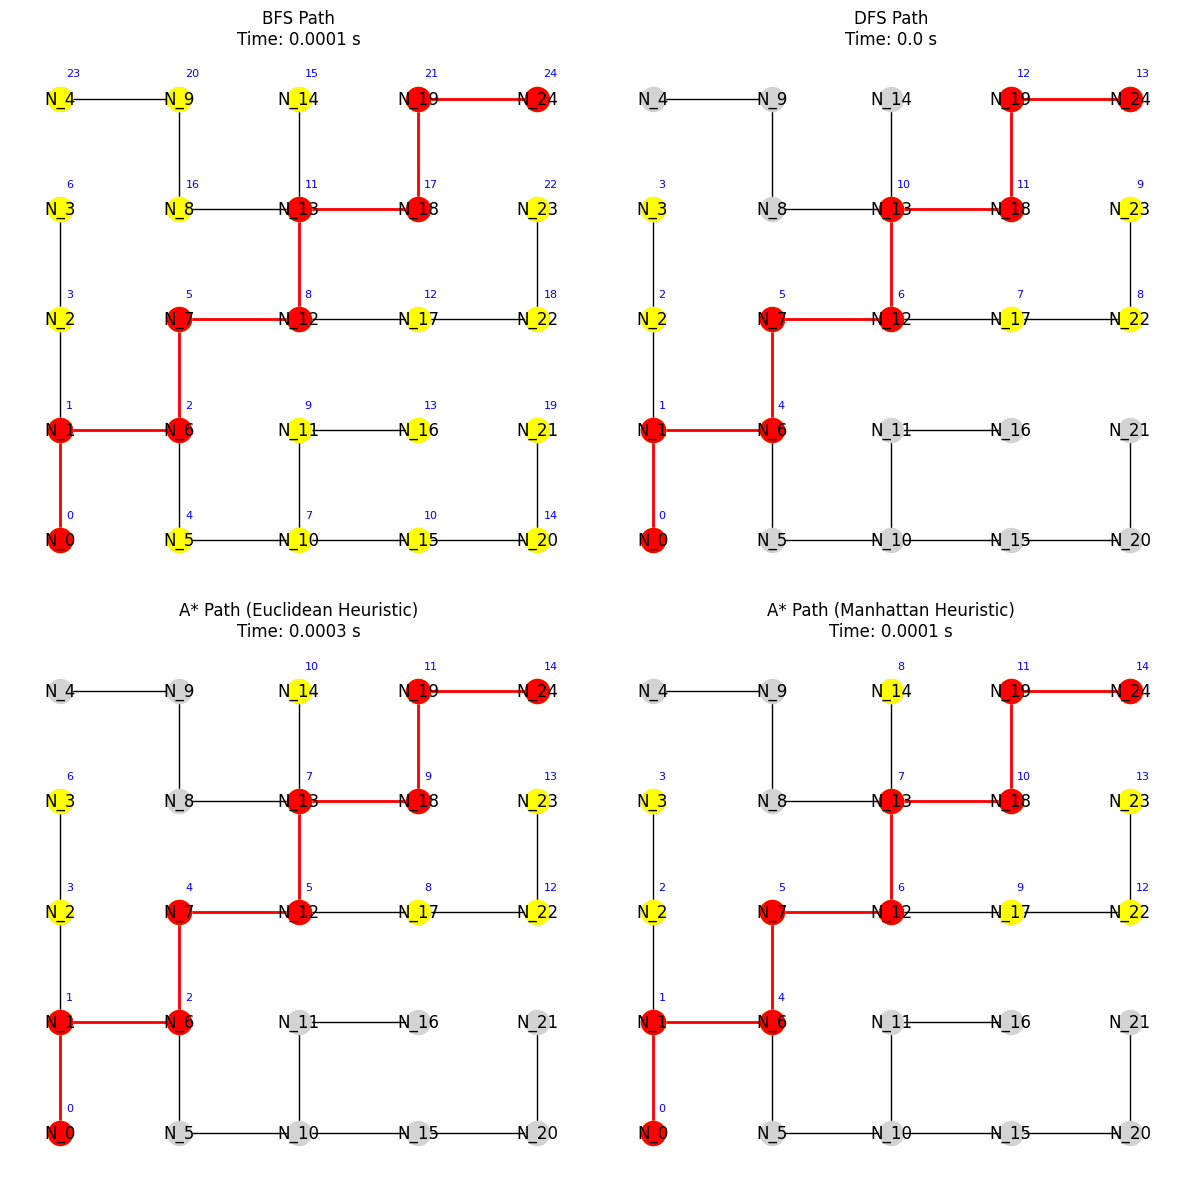

In [ ]:
r1 = run_all_algorithms("TestCase_01_EdgeList.txt", "TestCase_01_NodeID.csv")

# TestCase 02

Start: N_0, Goal: N_99

BFS Path: ['N_0', 'N_10', 'N_11', 'N_1', 'N_2', 'N_3', 'N_13', 'N_23', 'N_24', 'N_34', 'N_35', 'N_36', 'N_46', 'N_56', 'N_57', 'N_67', 'N_68', 'N_78', 'N_79', 'N_89', 'N_99']
BFS Time: 0.0004 s
BFS Visited Nodes: ['N_0', 'N_10', 'N_20', 'N_11', 'N_1', 'N_2', 'N_3', 'N_12', 'N_4', 'N_13', 'N_14', 'N_23', 'N_33', 'N_24', 'N_22', 'N_34', 'N_25', 'N_35', 'N_15', 'N_26', 'N_45', 'N_36', 'N_16', 'N_55', 'N_44', 'N_46', 'N_37', 'N_6', 'N_54', 'N_43', 'N_56', 'N_47', 'N_27', 'N_38', 'N_5', 'N_64', 'N_53', 'N_42', 'N_66', 'N_57', 'N_28', 'N_17', 'N_48', 'N_63', 'N_32', 'N_52', 'N_67', 'N_58', 'N_18', 'N_31', 'N_68', 'N_59', 'N_8', 'N_41', 'N_30', 'N_21', 'N_69', 'N_78', 'N_49', 'N_7', 'N_9', 'N_51', 'N_40', 'N_79', 'N_77', 'N_19', 'N_50', 'N_61', 'N_89', 'N_87', 'N_29', 'N_60', 'N_71', 'N_99']

DFS Path: ['N_0', 'N_10', 'N_11', 'N_1', 'N_2', 'N_3', 'N_13', 'N_23', 'N_24', 'N_34', 'N_35', 'N_36', 'N_46', 'N_56', 'N_57', 'N_67', 'N_68', 'N_78', 'N_79', 'N_89', 'N_99']
DFS 

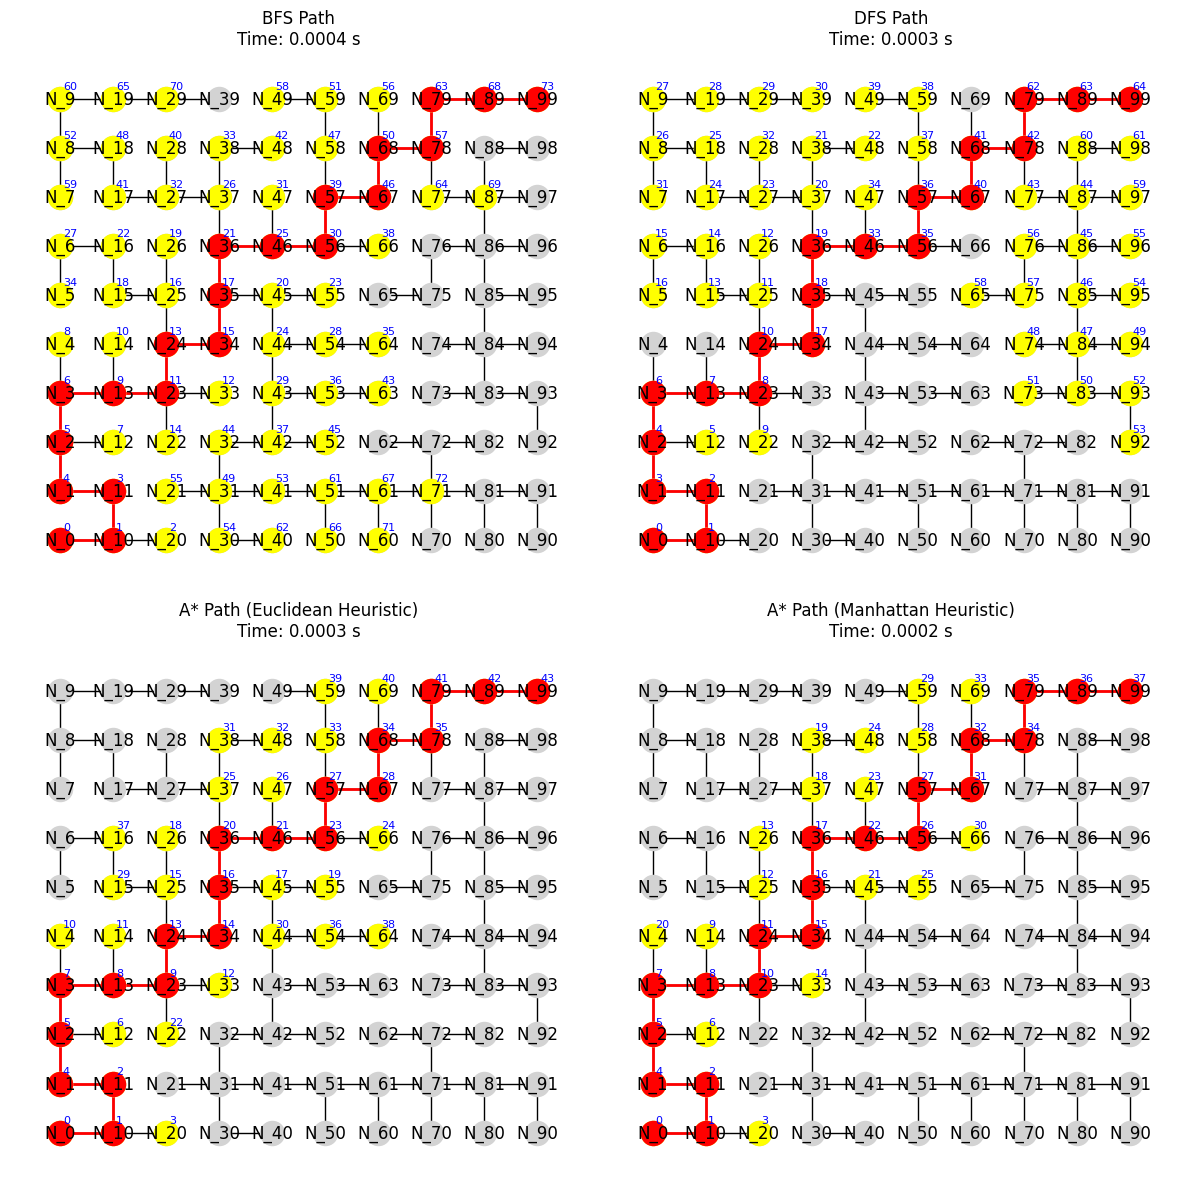

In [ ]:
r2 = run_all_algorithms("TestCase_02_EdgeList.txt", "TestCase_02_NodeID.csv")

# TestCase 03

Start: N_0, Goal: N_999

BFS Path: ['N_0', 'N_100', 'N_200', 'N_300', 'N_301', 'N_302', 'N_402', 'N_502', 'N_602', 'N_603', 'N_503', 'N_403', 'N_303', 'N_203', 'N_204', 'N_205', 'N_206', 'N_207', 'N_107', 'N_108', 'N_109', 'N_110', 'N_111', 'N_112', 'N_212', 'N_213', 'N_113', 'N_114', 'N_115', 'N_116', 'N_117', 'N_17', 'N_18', 'N_19', 'N_20', 'N_21', 'N_121', 'N_122', 'N_123', 'N_124', 'N_125', 'N_225', 'N_226', 'N_126', 'N_127', 'N_227', 'N_228', 'N_128', 'N_129', 'N_130', 'N_230', 'N_330', 'N_331', 'N_332', 'N_333', 'N_233', 'N_234', 'N_235', 'N_135', 'N_35', 'N_36', 'N_37', 'N_38', 'N_138', 'N_139', 'N_140', 'N_40', 'N_41', 'N_42', 'N_142', 'N_242', 'N_243', 'N_244', 'N_144', 'N_145', 'N_45', 'N_46', 'N_146', 'N_147', 'N_148', 'N_149', 'N_249', 'N_349', 'N_449', 'N_450', 'N_550', 'N_551', 'N_451', 'N_351', 'N_352', 'N_252', 'N_253', 'N_153', 'N_53', 'N_54', 'N_55', 'N_155', 'N_156', 'N_157', 'N_158', 'N_159', 'N_59', 'N_60', 'N_61', 'N_62', 'N_162', 'N_163', 'N_164', 'N_165', 'N_65'

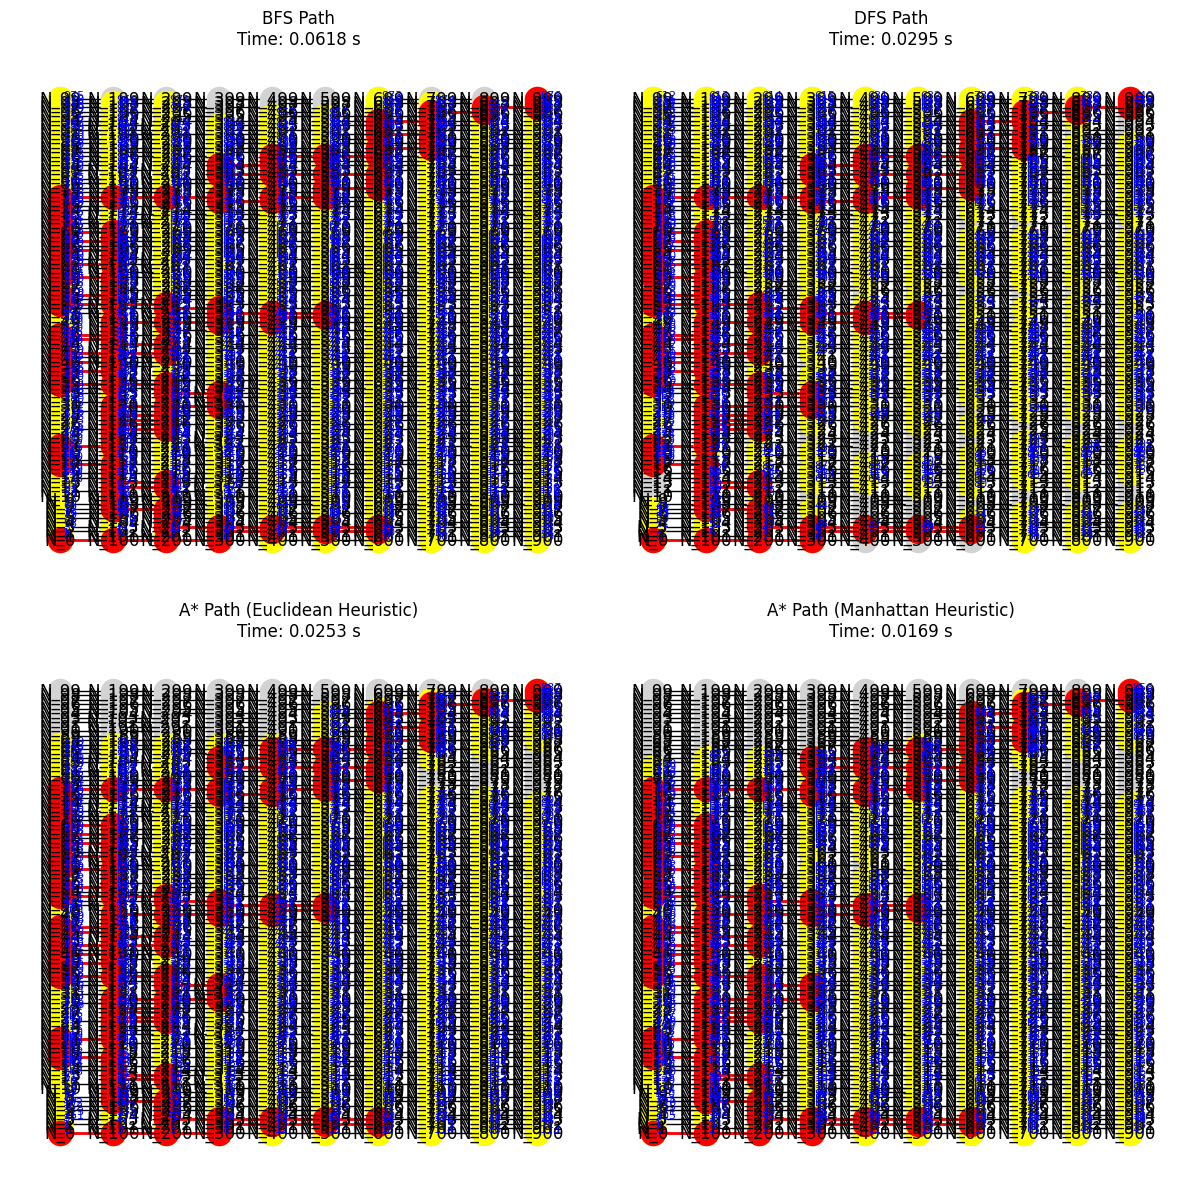

In [ ]:
r3 = run_all_algorithms("TestCase_03_EdgeList.txt", "TestCase_03_NodeID.csv")

# Report

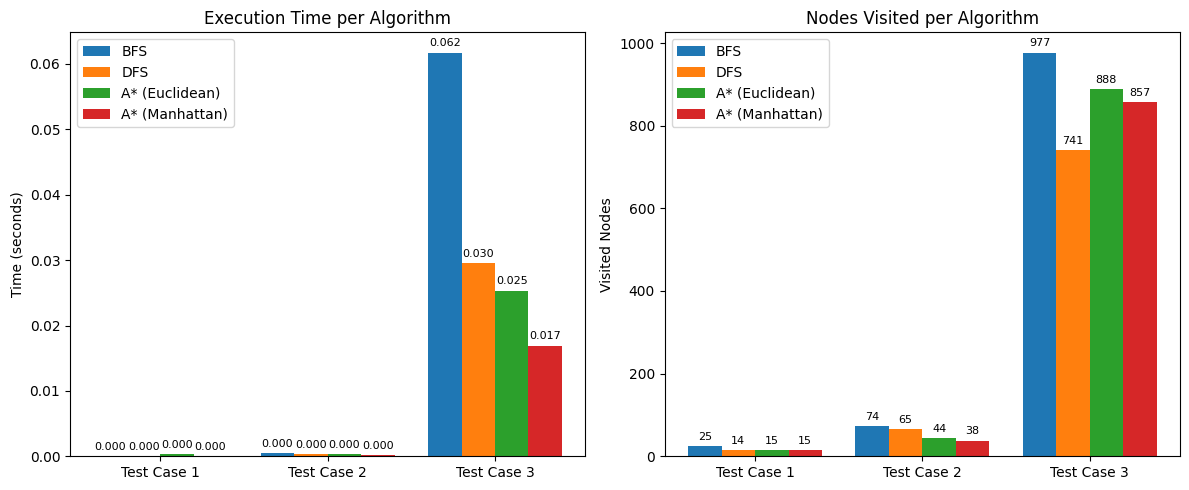

In [ ]:
# Generate Table and Plot
results_list = [r1, r2, r3]  # Collected from run_all_algorithms()
df = summarize_and_plot_results(results_list)

This report compares four search algorithms for robot path planning: Breadth-First Search (BFS), Depth-First Search (DFS), and two informed A* variants using Euclidean and Manhattan heuristics. The evaluation, conducted across three increasingly complex test cases, focuses on execution time, path length, and the number of nodes visited.

All algorithms produced the same optimal path length, confirming their ability to find the shortest path. However, they differed in execution time and node expansion. In the simplest case (Test Case 1), DFS was the fastest at 0.000029 seconds, while BFS was slower. The A* variants had slightly higher runtimes but were more efficient in node visits.

In the more complex Test Cases 2 and 3, A* significantly outperformed the uninformed searches. A* with the Manhattan heuristic was the fastest, completing Test Case 3 in 0.016843 seconds, compared to BFS’s 0.064091 seconds. BFS also visited the most nodes—977—while DFS, A* (Euclidean), and A* (Manhattan) visited 741, 888, and 857 nodes respectively.

Interestingly, although both A* variants visited more nodes than DFS in Test Case 3, they still ran faster, indicating better internal efficiency.

The Euclidean heuristic, based on straight-line distance, and the Manhattan heuristic, based on grid-aligned distances, were both admissible and consistent. While both guided A* effectively, the Manhattan heuristic led to consistently faster and leaner searches, making it more efficient for grid-based planning. The Manhattan heuristic outperformed the Euclidean heuristic because it better aligns with the constraints of the grid-based environment used in the path planning problem. In this setting, the robot can only move in orthogonal directions—up, down, left, or right—making straight-line diagonal movement, as assumed by the Euclidean heuristic, impossible. While both heuristics are admissible and consistent, the Euclidean heuristic underestimates the actual cost more frequently due to its assumption of unrestricted movement, leading to less efficient search behavior. In contrast, the Manhattan heuristic provides a more accurate estimate of the true path cost in a grid, allowing A* to focus its exploration more effectively. This resulted in fewer node expansions and faster performance, making the Manhattan heuristic a better fit for the problem.

In conclusion, A* with the Manhattan heuristic is the most suitable choice for this task. It delivered optimal paths with minimal computational cost. BFS, while correct, scaled poorly with complexity, and DFS, though fast in simple cases, was less reliable. Informed search, particularly with well-chosen heuristics, offers both optimality and scalability, making it ideal for practical path planning.